# Spam Classification of Emails

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('emails.csv')
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [10]:
df.columns

Index(['text', 'spam'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


<Axes: xlabel='spam', ylabel='count'>

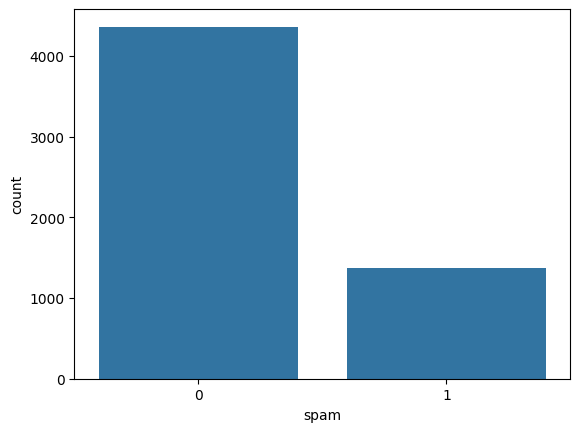

In [14]:
sns.countplot(x='spam',data=df)

In [16]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sooraj
[nltk_data]     sb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stop_words = set(stopwords.words('english'))

In [26]:
stemmer = PorterStemmer()

In [28]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'^subject:\s*', '', text)  # Removing "Subject: " at the beginning
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  
    return text

In [30]:
df['text'] = df['text'].apply(clean_text)
df.head()

,text,spam
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,color print special request addit inform click...,1
4,money get softwar cd softwar compat great grow...,1


In [32]:
x = df['text']
y = df['spam']

In [34]:
#!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [38]:
vectorizer = TfidfVectorizer(max_features=4000) 
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=1, sampling_strategy='auto')
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_tfidf, y_train)

In [42]:
y_train_balanced.value_counts()

spam
0    3504
1    3504
Name: count, dtype: int64

In [44]:
# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(x_train_balanced, y_train_balanced)
y_pred_lr = lr_model.predict(x_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9860383944153578
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       856
           1       0.95      0.99      0.97       290

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [48]:
# Support Vector Machine model
svm_model = SVC()
svm_model.fit(x_train_balanced, y_train_balanced)
y_pred_svm = svm_model.predict(x_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9869109947643979
SVM Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.96      0.97       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [54]:
import pickle
with open("svm_model.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)

In [56]:
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [76]:
# Function to predict Spam or Not Spam
def predict_email(text):
    with open("svm_model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
    with open("tfidf_vectorizer.pkl", "rb") as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)
    
    cleaned_text = clean_text(text)
    text_tfidf = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_tfidf)[0]
    return "Spam" if prediction == 1 else "Not Spam"

In [78]:
d=df.iloc[1:5,:]
d

,text,spam
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,color print special request addit inform click...,1
4,money get softwar cd softwar compat great grow...,1


In [80]:
list(d['text'])

['stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morristown superior deoxyribonucl clockwork tri hall incred mcdougal ye hepburn einsteinian earmark sapl boar duan plain palfrey inflex like huzzah pepperoni bedtim nameabl attir tri edt chronographi optima ye pirogu diffus albeit',
 'unbeliev new home made easi im want show homeown pre approv home loan fix rate offer extend uncondit credit way factor take advantag limit time opportun ask visit websit complet minut post approv form look foward hear dorca pittman',
 'color print special request addit inform click click printabl version order form pdf format phone fax e mail ramsey goldengraphix com request addit inform click click printabl version order form pdf format golden graphix print azusa canyon rd irwindal ca e mail messag advertis solicit',
 'money get softw

In [82]:
d1=df.iloc[5723:,:]
d1

,text,spam
5723,research develop charg gpg forward shirley cre...,0
5724,receipt visit jim thank invit visit lsu shirle...,0
5725,enron case studi updat wow day super thank muc...,0
5726,interest david pleas call shirley crenshaw ass...,0
5727,news aurora updat aurora version fastest model...,0


In [84]:
list(d1['text'])

['research develop charg gpg forward shirley crenshaw hou ect vinc j kaminski pm vera apodaca et enron enron cc vinc j kaminski hou ect ect shirley crenshaw hou ect ect pinnamaneni krishnarao hou ect ect subject research develop charg gpg vera shall talk account group correct vinc pm vera apodaca enron vera apodaca enron vera apodaca enron pm pm pinnamaneni krishnarao hou ect ect cc vinc j kaminski hou ect ect subject research develop charg gpg per mail date june kim watson suppos occur true juli fist six month review juli actual abl locat entri would pl let know whether entri made intend process thank',
 'receipt visit jim thank invit visit lsu shirley fedex receipt tomorrow vinc jame r garven pm vinc j kaminski cc subject receipt visit dear vinc thank take time visit faculti student got lot present favor ask concern expens reimburs process mail travel lodg receipt secretari joan payn follow address joan payn depart financ ceba louisiana state univers baton roug la thank jim garven ja

In [88]:
# Example usage 1
email = "stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morristown superior deoxyribonucl clockwork tri hall incred mcdougal ye hepburn einsteinian earmark sapl boar duan plain palfrey inflex like huzzah pepperoni bedtim nameabl attir tri edt chronographi optima ye pirogu diffus albeit"
print("Prediction:", predict_email(email))

Prediction: Spam


In [90]:
# Example usage 2
email = "research develop charg gpg forward shirley crenshaw hou ect vinc j kaminski pm vera apodaca et enron enron cc vinc j kaminski hou ect ect shirley crenshaw hou ect ect pinnamaneni krishnarao hou ect ect subject research develop charg gpg vera shall talk account group correct vinc pm vera apodaca enron vera apodaca enron vera apodaca enron pm pm pinnamaneni krishnarao hou ect ect cc vinc j kaminski hou ect ect subject research develop charg gpg per mail date june kim watson suppos occur true juli fist six month review juli actual abl locat entri would pl let know whether entri made intend process thank"
print("Prediction:", predict_email(email))

Prediction: Not Spam
